In [8]:
import pandas as pd
import numpy as np
from sklearn import svm

# Visual Data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)\

%matplotlib inline

In [9]:
df = pd.read_csv('recipes_muffins_cupcakes.csv')
df.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


In [10]:
df.rename(columns={'Sugar': 'sugar', 'Flour': 'flour'}, inplace=True)

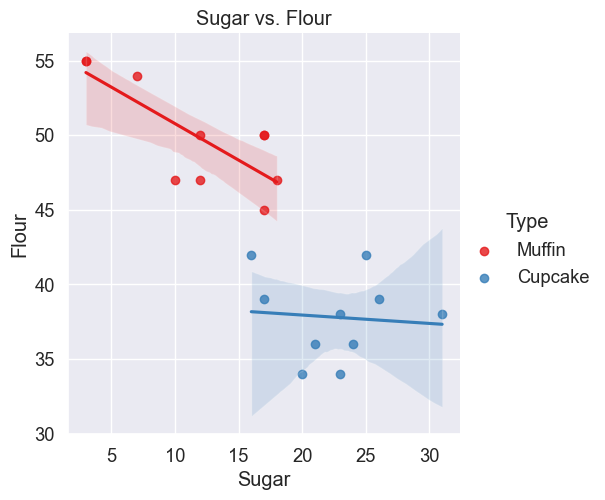

In [11]:
sns.lmplot(x='sugar', y='flour', data=df, hue='Type', palette='Set1')
plt.title('Sugar vs. Flour')
plt.xlabel('Sugar')
plt.ylabel('Flour')
plt.show()

In [12]:
#foramte data / Preprocessing
type_label = np.where(df['Type'] == 'Muffin', 1, 0)
rec_feature = df.columns.values[1:].tolist()
rec_feature
ingridients = df[['flour', 'sugar']].values
ingridients

array([[55,  3],
       [47, 12],
       [47, 18],
       [45, 17],
       [50, 12],
       [55,  3],
       [54,  7],
       [47, 10],
       [50, 17],
       [50, 17],
       [39, 26],
       [42, 16],
       [34, 20],
       [39, 17],
       [38, 23],
       [42, 25],
       [36, 21],
       [38, 31],
       [36, 24],
       [34, 23]], dtype=int64)

In [13]:
# fit our model
model = svm.SVC(kernel='linear')
model.fit(ingridients, type_label)

SVC(kernel='linear')

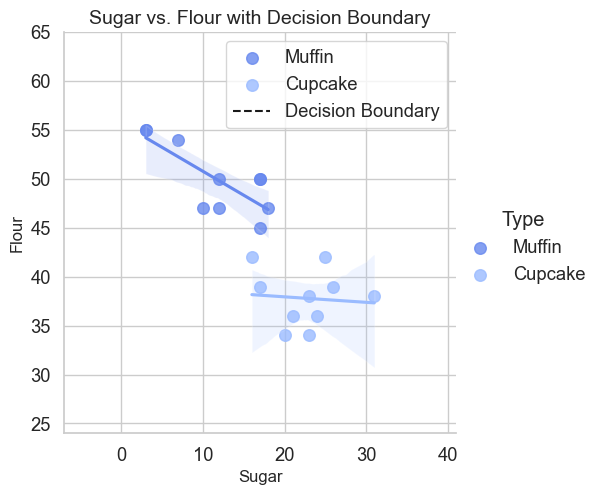

In [21]:
# predict
val = model.coef_[0]
a = - val[0] / val[1]
b = - model.intercept_[0] / val[1]
# w = model.coef_[0]
# a = - w[0] / w[1]
# xx = np.linspace(30,60)
# yy = a * xx - (model.intercept_[0] / w[1]) # y = ax + b

# plot
sns.lmplot(x='sugar', y='flour', data=df, hue='Type', palette='Set1')
plt.title('Sugar vs. Flour')
plt.xlabel('Sugar')
plt.ylabel('Flour')
plt.plot([0, 200], [b, a * 200 + b], 'k-')
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.show()


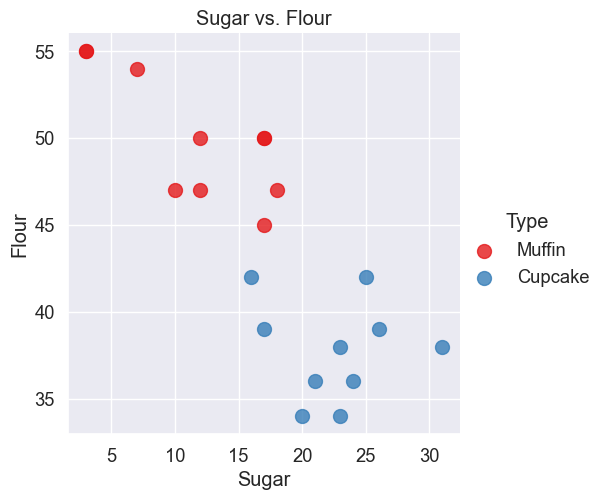

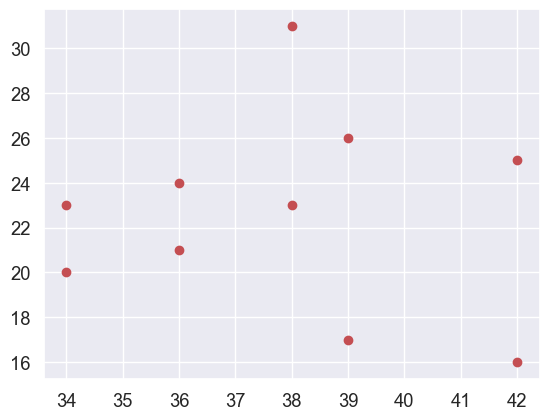

In [ ]:
sns.lmplot(x='sugar', y='flour', data=df, hue='Type', palette='Set1',fit_reg=False,scatter_kws={'s': 100})
plt.title('Sugar vs. Flour')
plt.xlabel('Sugar')
plt.ylabel('Flour')
plt.show()

plt.plot(ingridients[type_label == 0, 0], ingridients[type_label == 0, 1], 'ro', label='Muffin')

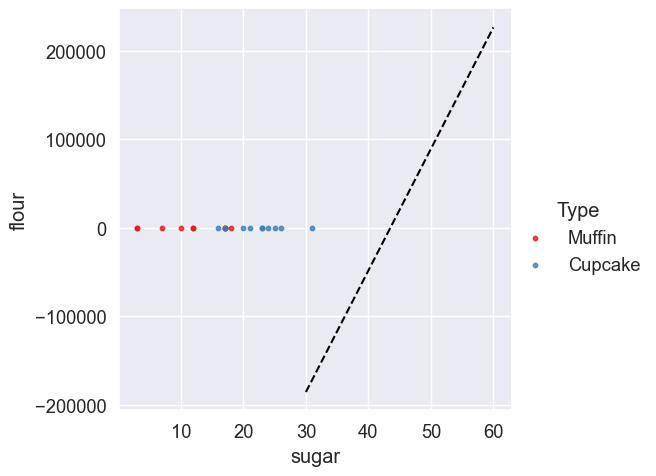

In [ ]:
sns.lmplot(x='sugar', y='flour', data=df, hue='Type', palette='Set1',fit_reg=False,scatter_kws={'s': 10})
# plt.title('Sugar vs. Flour')
# plt.xlabel('Sugar')
# plt.ylabel('Flour')
# plt.show()
plt.plot(xx,yy, linestyle='--', color='black')

In [ ]:
#Create a new muffin
def muffin_or_cupcake(sugar, flour):
    new_recipe = np.array([[sugar, flour]])
    prediction = model.predict(new_recipe)
    if prediction == 1:
        print('You are looking for Muffin Recipe')
    else:
        print('Your are looking for Cupcake Recipe')

muffin_or_cupcake(50, 30)
muffin_or_cupcake(20, 50)
muffin_or_cupcake(30, 20)
muffin_or_cupcake(40, 40)



You are looking for Muffin Recipe
Your are looking for Cupcake Recipe
Your are looking for Cupcake Recipe
Your are looking for Cupcake Recipe


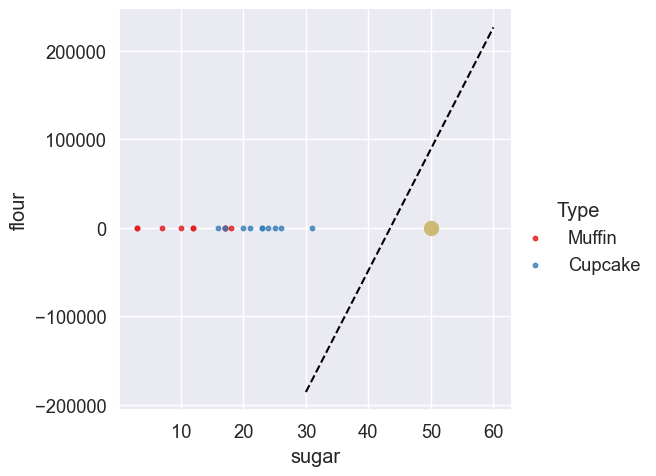

In [ ]:
sns.lmplot(x='sugar', y='flour', data=df, hue='Type', palette='Set1',fit_reg=False,scatter_kws={'s': 10})
# plt.title('Sugar vs. Flour')
# plt.xlabel('Sugar')
# plt.ylabel('Flour')
# plt.show()
plt.plot(xx,yy, linestyle='--', color='black')
plt.plot(50,20,'yo', markersize=10)